## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [5]:
(df['converted']==1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#df.count()[0]-df.query("group == 'treatment' and landing_page == 'new_page'").count()[0]
df.loc[(((df['group']=='treatment') & (df['landing_page'] !='new_page')) | ((df['group']!='treatment')&(df['landing_page']=='new_page')) )].count()[0]


#group == 'treatment' where landing_page != 'new_page'
#group != 'treatment' where landing_page == 'new_page'

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.loc[(((df['group']=='treatment') & (df['landing_page'] =='new_page')) | ((df['group']=='control')&(df['landing_page']=='old_page')) )]



In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
df2['group'].value_counts()

treatment    145311
control      145274
Name: group, dtype: int64

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2.query(("group=='treatment' and landing_page!='new_page'") or ("group=='control' and landing_page!='old_page'")).shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.set_index('user_id').index.get_duplicates() 

[773192]

c. What is the row information for the repeat **user_id**? 

In [14]:
dups =df2[df2.duplicated(subset='user_id')]
dups


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(['user_id'],inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
prob=df2.query('converted==1').count()[0]/df2.count()[0]
prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_ctrl=df2.query('converted==1 and group== "control"').count()[0]/df2.query('group=="control"').count()[0]
prob_ctrl

0.1203863045004612

In [18]:
df2.query("group == 'control' and landing_page=='old_page'").count()[0]

145274

In [19]:
df2.query("group == 'treatment' and landing_page=='new_page'").count()[0]

145310

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
prob_trt=df2.query('converted==1 and group== "treatment"').count()[0]/df2.query('group=="treatment"').count()[0]
prob_trt

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
prob_npg=df2.query('landing_page=="new_page"').count()[0]/df2.count()[0]
prob_npg

0.50006194422266881

In [22]:
prob_ncvt=df2.query('landing_page=="new_page" and converted==1').count()[0]/df2.count()[0]
prob_ncvt


0.059411392230817942

In [23]:
prob_ocvt=df2.query('landing_page=="old_page" and converted==1').count()[0]/df2.count()[0]
prob_ocvt

0.060185695014178343

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**
the probability suggests that the conversion happened marginally with almost 0.5% more for control group than the treatment ones. Also with the new page the conversion is very marginally less than old page conversions that have taken place.So neither page is better than another.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
null :: **$H_{0}$** **$p_{old}$**>=**$p_{new}$**

alternative ::**$H_{1}$** **$p_{new}$**>**$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
p_new=df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old=df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_old


0.11959708724499628

c. What is $n_{new}$?

In [26]:
n_new=df2.query('landing_page=="new_page"').count()[0]
n_new
 

145310

d. What is $n_{old}$?

In [27]:
n_old=df2.query('landing_page=="old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted=np.random.choice([0,1],n_new,p=(p_new,1-p_new))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted=np.random.choice([0,1],n_old,p=(p_old,1-p_old))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_cnvtd_mean=new_page_converted.mean()
old_page_cnvtd_mean=old_page_converted.mean()

In [31]:
new_page_cnvtd_mean-old_page_cnvtd_mean

0.00044256845239887266

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [32]:
p_diffs=[]
for _ in range(10000):
    new_page_cnvtd_means=np.random.choice([0,1],n_new,p=(p_new,1-p_new)).mean()
    old_page_cnvtd_means=np.random.choice([0,1],n_old,p=(p_old,1-p_old)).mean()
    p_diffs.append(new_page_cnvtd_means-old_page_cnvtd_means)
p_diffs

[0.00046303490483112775,
 0.0022043413620312924,
 0.0015368814428874389,
 0.00067674197418132742,
 -0.00052067410656819746,
 0.0001192908593325992,
 -0.00037621176846702742,
 0.00053875559639460224,
 0.00065611862753411909,
 -0.0001836584164257582,
 7.7611001574662275e-05,
 0.00072464880795586328,
 -0.00098182040676009219,
 -0.00047964229013341964,
 0.0034570611376973925,
 -0.0025786594097432225,
 -0.0019318535339408749,
 0.00015348347123755879,
 0.00076592108182893526,
 5.0228602877067097e-05,
 0.00147482381203623,
 0.00031859814730839098,
 0.0020532205888219579,
 0.00021561272770864726,
 0.0016540040165885506,
 0.0015161557739258313,
 0.00042183937269357763,
 0.0015920197167292871,
 -0.00087201965783711977,
 0.001130806907033155,
 0.00051804357040841076,
 6.4179871441027991e-05,
 0.00062832693957981522,
 -0.0037007811419050851,
 0.0015236651896134434,
 -0.00053453840116524098,
 0.0014269715501625813,
 -0.0020555902030806594,
 7.776277967397327e-05,
 0.0012617272658271839,
 -0.0002385

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [33]:
p_diffs=np.array(p_diffs)
p_diffs

array([ 0.00046303,  0.00220434,  0.00153688, ...,  0.00172989,
       -0.00043842, -0.00075499])

(array([   18.,   126.,   549.,  1435.,  2624.,  2620.,  1723.,   717.,
          165.,    23.]),
 array([ -4.41655036e-03,  -3.54868671e-03,  -2.68082305e-03,
         -1.81295939e-03,  -9.45095734e-04,  -7.72320774e-05,
          7.90631580e-04,   1.65849524e-03,   2.52635889e-03,
          3.39422255e-03,   4.26208621e-03]),
 <a list of 10 Patch objects>)

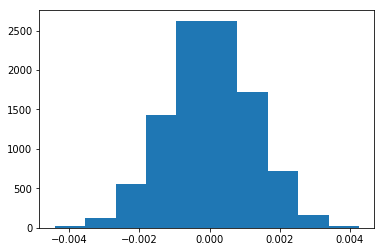

In [34]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
prob_ncvt=df2.query('landing_page=="new_page" and converted==1').count()[0]/df2.query('landing_page == "new_page"')['user_id'].nunique()
prob_ncvt



0.11880806551510564

In [36]:
prob_ocvt=df2.query('landing_page=="old_page" and converted==1').count()[0]/df2.query('landing_page=="old_page"').count()[0]
prob_ocvt

0.1203863045004612

In [37]:
obs_diff=prob_ncvt-prob_ocvt
obs_diff

-0.0015782389853555567

In [38]:
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.size)

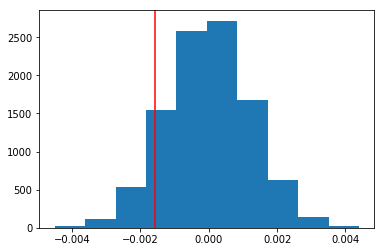

In [39]:
plt.hist(null_vals)
plt.axvline(obs_diff,c='red')

In [40]:
(null_vals>obs_diff).mean()

0.90100000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
In Scientific studies the calculated  value is called p-value. p value which is .9, is greater than the type1 error rate that is .05 hence null cannot be rejected. so old page conversion rate is better than new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="new_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="old_page" and converted==1').count()[0]
n_old = df2.query('landing_page=="new_page"').count()[0]
n_new = df2.query('landing_page=="old_page"').count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score,p_value=sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')

In [43]:
z_score,p_value

(1.3109241984234394, 0.094941687240975514)

In [44]:
from scipy.stats import norm

norm.cdf(z_score)
 # Tells us how significant our z-score is

0.90505831275902449

In [45]:


norm.ppf(1-(0.05/2))
## Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
The z score is less than critical value at 95% which is 1.9599 hence we fail to reject the null hypothesis. That means the old page is better than or equally good to new page.

They agree with the findings in parts j and k above that we cannot reject null hypothesis.






<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
The logistic regression fits in here because its either yes or no conversion based.


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
df2.head()
df2['intercept']=1
df2=df2.join(pd.get_dummies(df2['landing_page']))
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [47]:
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        07:36:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**
the p value is .19 for ab_page. The null hypothesiw here is there is no difference between control n treatment group.Here the comparision is done between groups where as in the part 2 the assumptions are checked using the page.

Since the pvalue is greater than .05 hence the null cannot be rejected. Which in turn means that the traetment n control group have almost same conversion rate.

**Put your answer here.**
Having other factors makes us to be more sure about the decision we are taking are good enough to justify our findings. However many additional terms can lead to lot of dependency and can make it tricky to which factors to consider more.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [50]:
countries=pd.read_csv('countries.csv')
countries['country'].value_counts()
#countries['country'].unique()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [51]:
#df3 = df2.merge(countries, on ='user_id', how='left')
#df3
joined_data = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
#adding dummy variables with 'US' as the baseline
joined_data[['UK_ind', 'CA_ind']] = pd.get_dummies(joined_data['country'])[['UK', "CA"]]
joined_data.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK_ind,CA_ind
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [52]:
joined_data['UK_ind_ab_page'] = joined_data['UK_ind']*joined_data['ab_page']
joined_data['CA_ind_ab_page'] = joined_data['CA_ind']*joined_data['ab_page']
joined_data.head()


,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK_ind,CA_ind,UK_ind_ab_page,CA_ind_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0,1,0


In [53]:
logit3 = sm.Logit(joined_data['converted'], joined_data[['intercept', 'ab_page', 'UK_ind', 'CA_ind', 'UK_ind_ab_page', 'CA_ind_ab_page']])
result3 = logit3.fit()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        07:36:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page           -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK_ind            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ind            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK_ind_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ind_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==================================================================================
"""

intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other variable in the summary are not statistically significant. 
Also,Z-score for all variables are not large enough to be significant for predicting converted rate.
for every unit decrease considering one variable at a time and others constant
a)the ab_page convert will happen at the rate of 2.1%
b)the CA country wise convert will happen at rateof 1.75%

c)the UK country wise convert will happen at the rate of almost 5.7%
d)the CA will have more conversion than US with 4.7% rate keeping other variables constant
e)The UK will have more conversion than US with 3.14% rate keeping other variables constant.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0